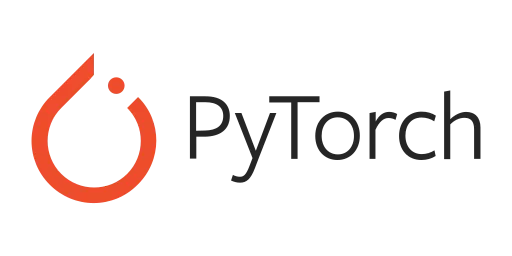

# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치 모듈 구조

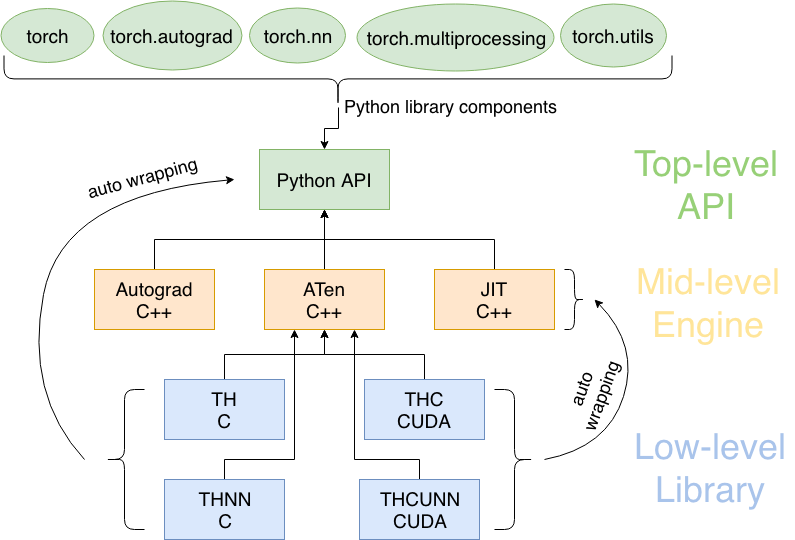

<small>출처: Deep Learning with PyTorch by Eli Stevens Luca Antiga. MEAP Publication. https://livebook.manning.com/#!/book/deep-learning-with-pytorch/welcome/v-7/</small>

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

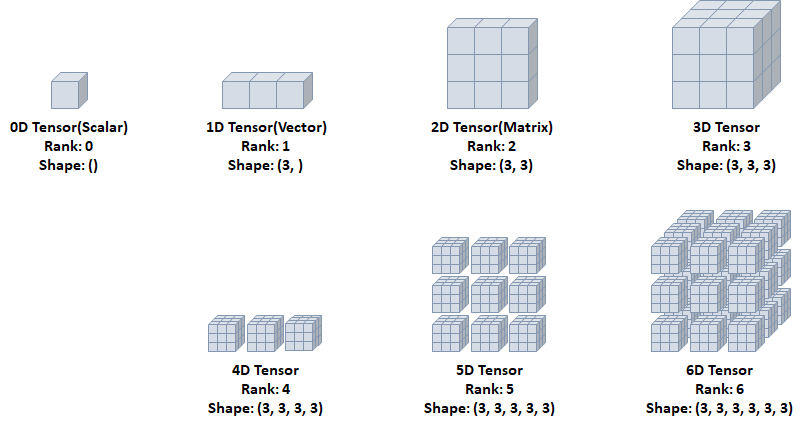

In [2]:
import torch

torch.__version__

/Users/yooobwoood/miniforge3/envs/torch/lib/python3.12/site-packages/torch/_subclasses/functional_tensor.py:295: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:84.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


'2.5.1'

### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [7]:
x = torch.empty(3,3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


무작위로 초기화된 텐서

In [8]:
x = torch.rand(3,3)
print(x)

tensor([[0.1941, 0.6706, 0.5979],
        [0.2999, 0.0039, 0.2526],
        [0.9602, 0.6709, 0.5420]])


데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [9]:
x = torch.zeros(3,3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [11]:
x = torch.tensor([2,5.4])
print(x)

tensor([2.0000, 5.4000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [12]:
x = x.new_ones(2,4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [13]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.3995, -0.0212, -0.9647, -1.8816],
        [-1.5039, -0.4083, -1.2738, -0.1756]])


텐서의 크기 계산

In [14]:
print(x.size())

torch.Size([2, 4])


### 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [15]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [16]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [18]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [19]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [20]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.2764])
0.27635571360588074
torch.float32


In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

y = torch.ones_like(x, device=device)
print(y)

x = x.to(device)
print(x)

z = x + y
print(z)
print(z.to('cpu', torch.double))

cpu
tensor([1.])
tensor([0.2764])
tensor([1.2764])
tensor([1.2764], dtype=torch.float64)


### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [22]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [23]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

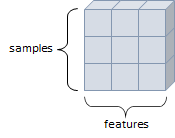

In [24]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

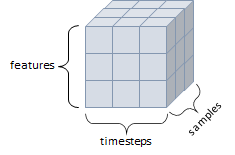

In [25]:
t3 = torch.tensor([[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

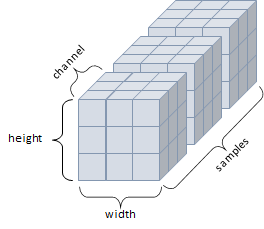

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [27]:
import math

a = torch.rand(1,2) * 2 -1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

tensor([[-0.8454,  0.9036]])
tensor([[0.8454, 0.9036]])
tensor([[-0., 1.]])
tensor([[-1.,  0.]])
tensor([[-0.5000,  0.5000]])


In [30]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,2])))

tensor([[-0.8454,  0.9036]])
tensor(-0.8454)
tensor(0.9036)
tensor(0.0291)
tensor(1.2367)
tensor(-0.7639)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [35]:
x = torch.rand(2,2)
print(x)
print(x.min(dim=0))
print(x.min(dim=1))

tensor([[0.1159, 0.7600],
        [0.2197, 0.2614]])
torch.return_types.min(
values=tensor([0.1159, 0.2614]),
indices=tensor([0, 1]))
torch.return_types.min(
values=tensor([0.1159, 0.2197]),
indices=tensor([0, 0]))


In [36]:
print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.1159, 0.7600],
        [0.2197, 0.2614]])
torch.return_types.max(
values=tensor([0.2197, 0.7600]),
indices=tensor([1, 0]))
torch.return_types.max(
values=tensor([0.7600, 0.2614]),
indices=tensor([1, 1]))


In [37]:
x = torch.rand(2,2)
print(x)

y = torch.rand(2,2)
print(y)

tensor([[0.8224, 0.0193],
        [0.6539, 0.2718]])
tensor([[0.9769, 0.7168],
        [0.5432, 0.7637]])


`torch.add`: 덧셈

In [38]:
print(x + y)
print(torch.add(x,y))

tensor([[1.7993, 0.7360],
        [1.1971, 1.0355]])
tensor([[1.7993, 0.7360],
        [1.1971, 1.0355]])


결과 텐서를 인자로 제공

In [39]:
result = torch.empty(2,4)

torch.add(x, y, out=result)
print(result)

tensor([[1.7993, 0.7360],
        [1.1971, 1.0355]])


/var/folders/s3/0kfwb4dj6_547zz0z5k83q6r0000gn/T/ipykernel_18926/1867357519.py:3: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Resize.cpp:35.)
  torch.add(x, y, out=result)


`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [40]:
print(x)
print(y)

y.add_(x)
print(y)

tensor([[0.8224, 0.0193],
        [0.6539, 0.2718]])
tensor([[0.9769, 0.7168],
        [0.5432, 0.7637]])
tensor([[1.7993, 0.7360],
        [1.1971, 1.0355]])


`torch.sub`: 뺄셈

In [41]:
print(x)
print(y)

print(x - y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[0.8224, 0.0193],
        [0.6539, 0.2718]])
tensor([[1.7993, 0.7360],
        [1.1971, 1.0355]])
tensor([[-0.9769, -0.7168],
        [-0.5432, -0.7637]])
tensor([[-0.9769, -0.7168],
        [-0.5432, -0.7637]])
tensor([[-0.9769, -0.7168],
        [-0.5432, -0.7637]])


`torch.mul`: 곱셉

In [42]:
print(x)
print(y)

print(x * y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[0.8224, 0.0193],
        [0.6539, 0.2718]])
tensor([[1.7993, 0.7360],
        [1.1971, 1.0355]])
tensor([[1.4797, 0.0142],
        [0.7828, 0.2815]])
tensor([[1.4797, 0.0142],
        [0.7828, 0.2815]])
tensor([[1.4797, 0.0142],
        [0.7828, 0.2815]])


`torch.div`: 나눗셈

In [43]:
print(x)
print(y)

print(x / y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.8224, 0.0193],
        [0.6539, 0.2718]])
tensor([[1.7993, 0.7360],
        [1.1971, 1.0355]])
tensor([[0.4571, 0.0262],
        [0.5462, 0.2625]])
tensor([[0.4571, 0.0262],
        [0.5462, 0.2625]])
tensor([[0.4571, 0.0262],
        [0.5462, 0.2625]])


`torch.mm`: 내적(dot product)

In [45]:
print(x)
print(y)

print(torch.matmul(x,y))

z = torch.mm(x,y)
print(z)
print(torch.svd(z))

tensor([[0.8224, 0.0193],
        [0.6539, 0.2718]])
tensor([[1.7993, 0.7360],
        [1.1971, 1.0355]])
tensor([[1.5028, 0.6253],
        [1.5019, 0.7628]])
tensor([[1.5028, 0.6253],
        [1.5019, 0.7628]])
torch.return_types.svd(
U=tensor([[-0.6948, -0.7192],
        [-0.7192,  0.6948]]),
S=tensor([2.3407, 0.0885]),
V=tensor([[-0.9075, -0.4200],
        [-0.4200,  0.9075]]))


### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [46]:
x = torch.Tensor([[1,2],
                  [3,4]])

print(x)

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])

print(x[:,0])
print(x[:,1])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])


`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [49]:
x = torch.randn(4,5)
print(x)

y = x.view(20)
print(y)

z = x.view(5,-1)
print(z)

tensor([[-2.0694,  0.8214,  0.0987,  0.2964,  2.3446],
        [-0.0654, -0.0483, -0.0638,  0.7995, -0.0522],
        [-1.7622,  1.3294,  1.1473, -0.0611, -1.8140],
        [ 1.2557, -1.5310, -1.1965, -0.0929, -0.4919]])
tensor([-2.0694,  0.8214,  0.0987,  0.2964,  2.3446, -0.0654, -0.0483, -0.0638,
         0.7995, -0.0522, -1.7622,  1.3294,  1.1473, -0.0611, -1.8140,  1.2557,
        -1.5310, -1.1965, -0.0929, -0.4919])
tensor([[-2.0694,  0.8214,  0.0987,  0.2964],
        [ 2.3446, -0.0654, -0.0483, -0.0638],
        [ 0.7995, -0.0522, -1.7622,  1.3294],
        [ 1.1473, -0.0611, -1.8140,  1.2557],
        [-1.5310, -1.1965, -0.0929, -0.4919]])


`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [50]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.5558])
-0.5557665228843689
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [52]:
# 에러 발생
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([0.2511, 0.1092])


RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

`squeeze`: 차원을 축소(제거)

In [58]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.7707, 0.2251, 0.7725],
         [0.7252, 0.7139, 0.7849],
         [0.8170, 0.1872, 0.3877]]])
torch.Size([1, 3, 3])


In [59]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.7707, 0.2251, 0.7725],
        [0.7252, 0.7139, 0.7849],
        [0.8170, 0.1872, 0.3877]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [60]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.7182, 0.9539, 0.6612],
        [0.3704, 0.3432, 0.4763],
        [0.9974, 0.7720, 0.8179]])
torch.Size([3, 3])


In [61]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.7182, 0.9539, 0.6612],
         [0.3704, 0.3432, 0.4763],
         [0.9974, 0.7720, 0.8179]]])
torch.Size([1, 3, 3])


In [62]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.7182],
         [0.9539],
         [0.6612]],

        [[0.3704],
         [0.3432],
         [0.4763]],

        [[0.9974],
         [0.7720],
         [0.8179]]])
torch.Size([3, 3, 1])


`stack`: 텐서간 결합

In [64]:
x = torch.FloatTensor([1,4])
print(x)

y = torch.FloatTensor([2,5])
print(y)

z = torch.FloatTensor([3,6])
print(z)

print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [65]:
a = torch.randn(1,3,3)
print(a)

b = torch.randn(1,3,3)
print(b)

c = torch.cat((a,b), dim=0)
print(c)
print(c.size())

tensor([[[-0.4760, -0.5419, -0.9099],
         [-0.1675, -0.8617,  0.7317],
         [-0.6244, -0.3878,  2.1147]]])
tensor([[[-0.4809,  0.7021,  0.5817],
         [ 0.2748,  0.1018,  0.7103],
         [ 2.3041, -1.8235,  0.4132]]])
tensor([[[-0.4760, -0.5419, -0.9099],
         [-0.1675, -0.8617,  0.7317],
         [-0.6244, -0.3878,  2.1147]],

        [[-0.4809,  0.7021,  0.5817],
         [ 0.2748,  0.1018,  0.7103],
         [ 2.3041, -1.8235,  0.4132]]])
torch.Size([2, 3, 3])


In [66]:
c = torch.cat((a,b), dim=1)
print(c)
print(c.size())

tensor([[[-0.4760, -0.5419, -0.9099],
         [-0.1675, -0.8617,  0.7317],
         [-0.6244, -0.3878,  2.1147],
         [-0.4809,  0.7021,  0.5817],
         [ 0.2748,  0.1018,  0.7103],
         [ 2.3041, -1.8235,  0.4132]]])
torch.Size([1, 6, 3])


In [67]:
c = torch.cat((a,b), dim=2)
print(c)
print(c.size())

tensor([[[-0.4760, -0.5419, -0.9099, -0.4809,  0.7021,  0.5817],
         [-0.1675, -0.8617,  0.7317,  0.2748,  0.1018,  0.7103],
         [-0.6244, -0.3878,  2.1147,  2.3041, -1.8235,  0.4132]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [68]:
tensor = torch.rand(3,6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.5808, 0.5078, 0.2477, 0.9704, 0.8314, 0.2700],
        [0.5011, 0.3040, 0.1452, 0.6412, 0.3176, 0.3918],
        [0.8029, 0.5640, 0.2086, 0.4071, 0.9533, 0.3924]])
tensor([[0.5808, 0.5078],
        [0.5011, 0.3040],
        [0.8029, 0.5640]])
tensor([[0.2477, 0.9704],
        [0.1452, 0.6412],
        [0.2086, 0.4071]])
tensor([[0.8314, 0.2700],
        [0.3176, 0.3918],
        [0.9533, 0.3924]])


`split`: `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [69]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.6349, 0.2805, 0.0079, 0.7106, 0.4381, 0.7793],
        [0.3343, 0.4028, 0.8043, 0.3530, 0.4261, 0.6684],
        [0.2710, 0.4642, 0.6085, 0.3647, 0.7288, 0.8558]])
tensor([[0.6349, 0.2805, 0.0079],
        [0.3343, 0.4028, 0.8043],
        [0.2710, 0.4642, 0.6085]])
tensor([[0.7106, 0.4381, 0.7793],
        [0.3530, 0.4261, 0.6684],
        [0.3647, 0.7288, 0.8558]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함